# **Validation Metrics**

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

# No crossvalidation for this dummy notebook
X_train, X_test, Y_train, Y_test = train_test_split(
    iris.data, iris.target, test_size=0.50, random_state=4)
    
# Use a very bad multiclass classifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## **Matriz de Confusión**

[[30  0  0]
 [ 0 19  3]
 [ 0  2 21]]


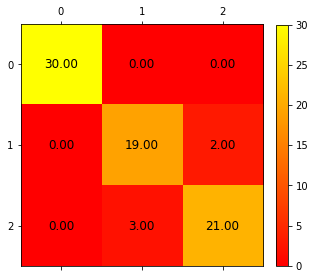

In [2]:
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

img = plt.matshow(cm, cmap=plt.cm.autumn)
plt.colorbar(img, fraction=0.045)
for x in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.text(x, y, "%0.2f" % cm[x,y], size=12, color='black', ha="center", va="center")
plt.show()




## **Multilabel Classification**

In [3]:
#  la parte de las etiquetas predichas que son exactamente iguales a las reales
from sklearn.metrics import classification_report
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

# cuenta el número de etiquetas correctas en cada conjunto de etiquetas clasificadas y
# se promedian los resultados en todas las etiquetas:
print("Precision:", metrics.precision_score(Y_test, Y_pred, average='weighted'))

# cantidad de etiquetas clasificadas correctamente en el conjunto dividida por el recuento
# total de etiquetas de ese conjunto
print("Recall:", metrics.recall_score(Y_test, Y_pred, average='weighted'))

# media armónica de la Precision y Recall , que se utiliza sobre todo cuando
#  se trata de conjuntos de datos desequilibrados
print("F1 score:", metrics.f1_score(Y_test, Y_pred, average='weighted'))


print (classification_report(Y_test, Y_pred, target_names=iris.target_names))


Accuracy: 0.9333333333333333
Precision: 0.9337301587301586
Recall: 0.9333333333333333
F1 score: 0.9332673593930398
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
  versicolor       0.90      0.86      0.88        22
   virginica       0.88      0.91      0.89        23

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



# **Cross-Validation**

Le sugerimos encarecidamente que utilice la validación cruzada sólo con fines de optimización y no para estimar el rendimiento (es decir, para averiguar cuál podría ser el error del modelo en datos frescos). La validación cruzada sólo señala el mejor algoritmo posible y la elección de parámetros basada en el mejor resultado promedio.

Además obtenemos una estimación bastante honesta del error fuera del muestreo pues estamos usando varios *train-test-split* 

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print (digits.DESCR)
X = digits.data
y = digits.target
X[0]

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
from sklearn import svm
from sklearn import model_selection
import numpy as np


# hipotesis a validar
h1 = svm.LinearSVC(C=1.0)  # linear SVC
h2 = svm.SVC(kernel='rbf', degree=3, gamma=0.001, C=1.0)  # Radial basis SVC
h3 = svm.SVC(kernel='poly', degree=3, C=1.0)  # 3rd degree polynomial SVC

choosen_random_state = 1
cv_folds = 10  # Try 3, 5 or 20
eval_scoring = 'accuracy'  # Try also f1
workers = -1  # this will use all your CPU power
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.30, random_state=choosen_random_state)

    
for hypothesis in [h1, h2, h3]:
    scores = model_selection.cross_val_score(
        hypothesis, X_train, y_train, cv=cv_folds, scoring=eval_scoring, n_jobs=workers)
    print("%s -> cross validation accuracy: mean = %0.3f \ std = %0.3f"
          % (hypothesis, np.mean(scores), np.std(scores)))


LinearSVC() -> cross validation accuracy: mean = 0.938 \ std = 0.016
SVC(gamma=0.001) -> cross validation accuracy: mean = 0.990 \ std = 0.007
SVC(kernel='poly') -> cross validation accuracy: mean = 0.988 \ std = 0.010


## cross-validation iterators

*   **KFold** es bastante simple en su funcionalidad. Si se da n-número de pliegues, devuelve n iteraciones a los índices de los conjuntos de entrenamiento y validación para la prueba de cada pliegue.
*   **StratifiedKFold** funciona comoK fold , pero siempre devuelve pliegues con aproximadamente el mismo porcentaje de clases que el conjunto de entrenamiento. En lugar del número de casos, como parámetro de entrada, necesita la variable
objetivo y. Es el iterador que se envuelve, por defecto, en la función `cross_val_score`, como vimos en la sección anterior.
*   **LeaveOneOut** funciona como Kfold , pero devuelve como conjunto de validación una sola observación. Por lo tanto, al final, el número de pliegues será equivalente al número de ejemplos del conjunto de entrenamiento. Le recomendamos que utilice este enfoque de validación cruzada sólo cuando el conjunto de entrenamiento esté muy desequilibrado (como en los problemas de detección de fraudes) o sea muy pequeño, especialmente si hay menos de 100 observaciones: una validación de k pliegues reduciría mucho el conjunto de entrenamiento.
*   **LeavePOut** es similar en cuanto a las ventajas y limitaciones de **LeaveOneOut**, pero su conjunto de validación se compone de P casos.Por lo tanto, el número de pliegues totales será la combinación de P casos de todos los casos disponibles (que en realidad podría serun número bastante grande a medida que el tamaño de su conjunto de datos crece).

Para saber más sobre  cada iterador[[página oficial Scikit-learn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.cross_validation)] 

## Bootstrapping :
funciona mediante elmuestreo con reemplazo (es decir, permitiendo la repetición de la misma
observación), y tenemos que tener cuidado con esto pues pueden existir los mismos datos en el conjunto de train com oen el de test

Una implementacion sencilla sustituto de **Bootstrap** que es adecuado para la validación cruzada y que puede ser
llamado por una iteración. Genera un bootstrap de muestra del mismo tamaño que los datos de entrada (la longitud de los índices) y una lista de los índices excluidos (fuera de la muestra) que podrían utilizarse para las pruebas: 

In [6]:
import random


def Bootstrap(n, n_iter=3, random_state=None):
    """
    Random sampling with replacement cross-validation generator.
    For each iter a sample bootstrap of the indexes [0, n) is 
    generated and the function returns the obtained sample 
    and a list of all the excluded indexes.
    """

    if random_state:
        random.seed(random_state)
    for j in range(n_iter):
        bs = [random.randint(0, n-1) for i in range(n)]

        # crear un set con todos los indicies y restarle los que ya pertenecen a las muestra
        out_bs = list({i for i in range(n)} - set(bs))

        yield bs, out_bs


boot = Bootstrap(n=20, n_iter=2, random_state=1)
for train_idx, validation_idx in boot:
    print(train_idx, validation_idx, "\n")


[4, 18, 2, 8, 3, 15, 14, 15, 12, 6, 3, 15, 0, 12, 13, 19, 0, 14, 8, 7] [1, 5, 9, 10, 11, 16, 17] 

[18, 3, 10, 0, 0, 0, 17, 0, 12, 6, 13, 0, 16, 7, 14, 15, 17, 7, 11, 7] [1, 2, 4, 5, 8, 9, 19] 



## Hyperparameter optimization with cross-validation (`GridSearchCV()`)

In [7]:
from sklearn import model_selection
from sklearn import svm
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

h = svm.SVC()
search_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},  # kernel lineal no usa gamma
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]


search_func = model_selection.GridSearchCV(
    estimator=h, param_grid=search_grid, scoring='accuracy', n_jobs=-1, refit=True, cv=10)
# refit=True para que la función se ajuste a todo el conjunto de entrenamiento, utilizando los
# parámetros del mejor estimador y poder usar *search_funct.predict()* a datos frescos para
# obtener nuevas predicciones

%timeit search_func.fit(X, y)
print(search_func.best_estimator_)
print(search_func.best_params_)
print(search_func.best_score_)


5.15 s ± 589 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SVC(C=10, gamma=0.001)
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.9810738671632526


## Reducing grid search run time

La función `GridSearchCV` puede realmente gestionar una gran cantidad de trabajo para usted pero cuando el espaciode búsqueda de datos o de la cuadrícula es grande, el procedimiento puede tardar mucho tiempo en calcularse. Una alternativa es el uso de `model_selection.RandomizedSearchCV` que  extrae aleatoriamente una muestra de combinaciones e informa de la mejor combinación encontrada y ademas se puede limitar el numero de iteraciones.

In [8]:
search_dict = {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}
scorer = 'accuracy'
search_func = model_selection.RandomizedSearchCV(estimator=h,
                                                 param_distributions=search_dict,
                                                 n_iter=7,
                                                 scoring=scorer,
                                                 n_jobs=-1,
                                                 refit=True,
                                                 cv=10,
                                                 return_train_score=False)
%timeit search_func.fit(X, y)
print(search_func.best_estimator_)
print(search_func.best_params_)
print(search_func.best_score_)


3.57 s ± 724 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SVC(C=1, gamma=0.001)
{'kernel': 'rbf', 'gamma': 0.001, 'C': 1}
0.9782929857231533


In [9]:
# mostrar los resultados de cada iteracion 
res = search_func.cv_results_
for el in zip(res['mean_test_score'], res['std_test_score'], res['params']):
    print(el)

(0.9604872749844816, 0.02132561342779354, {'kernel': 'linear', 'gamma': 0.001, 'C': 10})
(0.9699441340782122, 0.025403123263944748, {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10})
(0.9604872749844816, 0.02132561342779354, {'kernel': 'linear', 'gamma': 0.0001, 'C': 1})
(0.9604872749844816, 0.02132561342779354, {'kernel': 'linear', 'gamma': 0.001, 'C': 1000})
(0.9705027932960893, 0.02023224691609209, {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100})
(0.9604872749844816, 0.02132561342779354, {'kernel': 'linear', 'gamma': 0.0001, 'C': 10})
(0.9782929857231533, 0.01766901739189916, {'kernel': 'rbf', 'gamma': 0.001, 'C': 1})


Recurrir a la optimización basada en procesos aleatorios puede parecer que se basa en
busqueda ciega, pero en realidad es una forma muy eficiente de explorar el espacio de los hiperparámetros, especialmente cuando se trata de unespacio de alta dimensión